In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/Student Depression Dataset.csv


In [193]:
import pandas as pd

df = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")

In [194]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [195]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [196]:
df.shape

(27901, 18)

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [198]:
df['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [200]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

<Axes: xlabel='Depression', ylabel='count'>

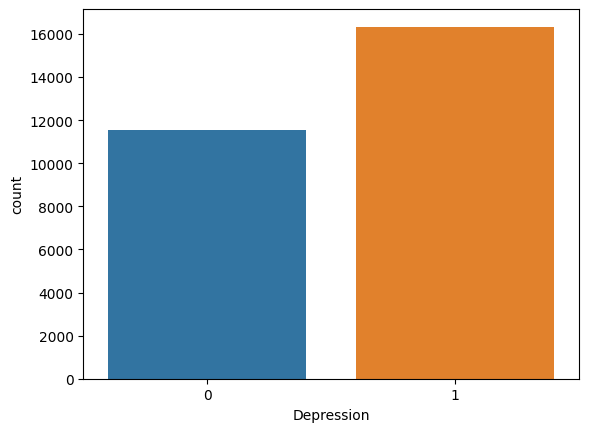

In [201]:
import seaborn as sns

sns.countplot(x = "Depression", data = df)

In [202]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

In [203]:
numerical_cols

['id',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [204]:
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()

In [205]:
categorical_cols

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [206]:
for col in categorical_cols:
    print(f"\n🔸 {col} sütunu değer dağılımı:")
    print(df[col].value_counts())


🔸 Gender sütunu değer dağılımı:
Gender
Male      15547
Female    12354
Name: count, dtype: int64

🔸 City sütunu değer dağılımı:
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
Ci

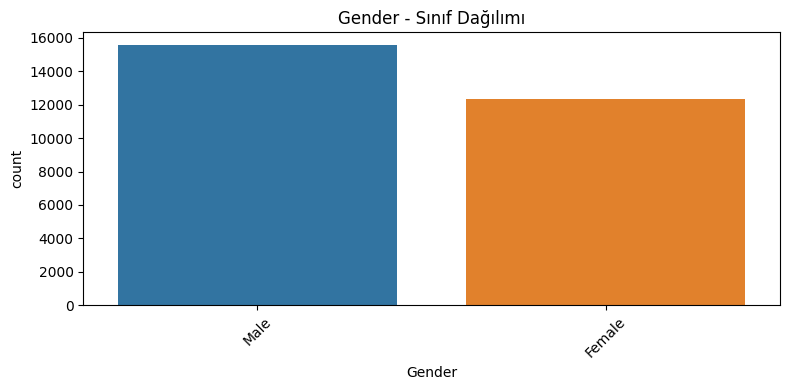

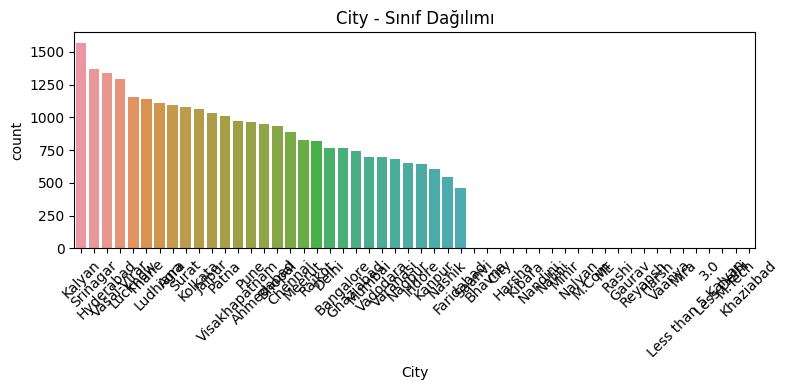

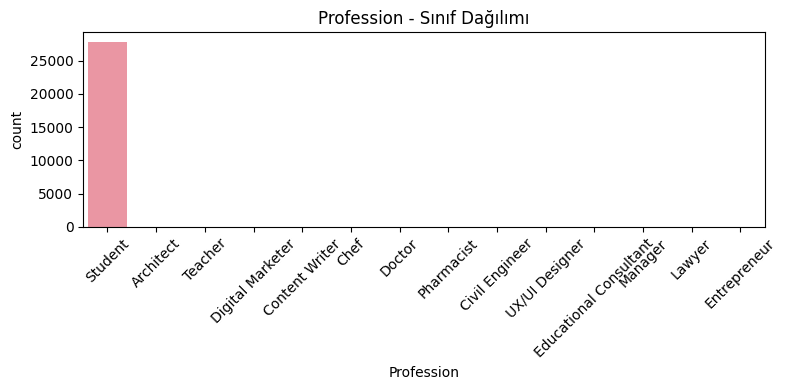

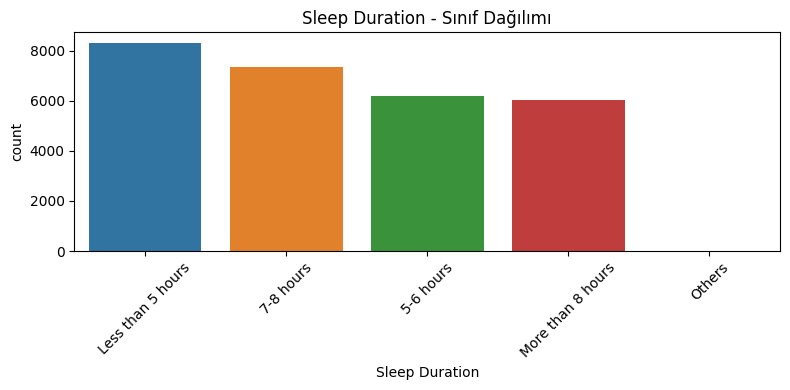

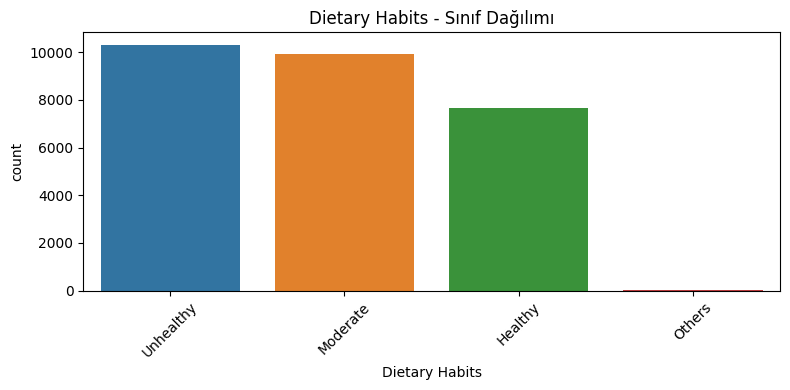

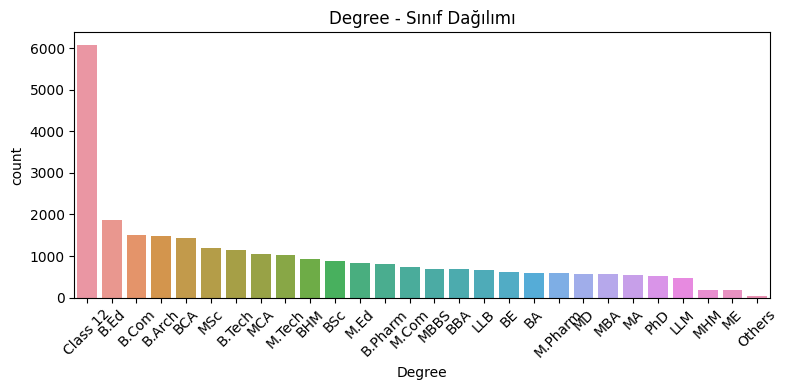

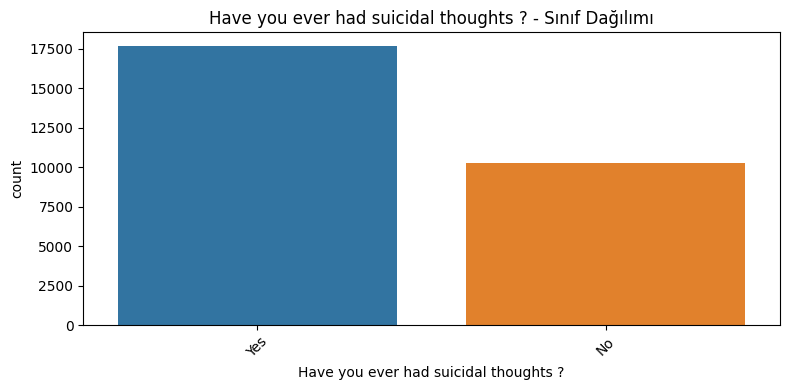

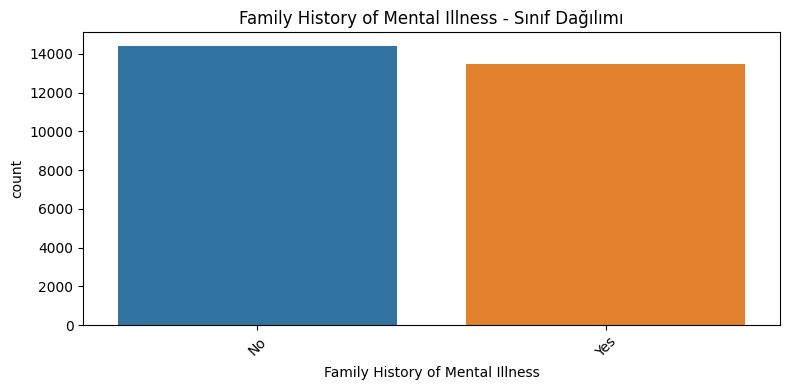

In [207]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} - Sınıf Dağılımı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [208]:
city_counts = df["City"].value_counts()
rare_cities = city_counts[city_counts < 100].index
df["City"] = df["City"].replace(rare_cities, "Other")

In [209]:
df.City.value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Other              26
Name: count, dtype: int64

In [210]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [211]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [212]:
df["Degree"].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [213]:
# 1. Student olan Profession sütununu tamamen kaldır
df.drop(columns=['Profession'], inplace=True)

# 2. City sütununu tamamen kaldır
df.drop(columns=['City'], inplace=True)

# 3. Sleep Duration'da 'Others' olan satırları kaldır
df = df[df['Sleep Duration'] != 'Others']

# 4. Dietary Habits'de 'Others' olan satırları kaldır
df = df[df['Dietary Habits'] != 'Others']

# 5. Degree'de 'Others' olan satırları kaldır
df = df[df['Degree'] != 'Others']

In [214]:
df.shape

(27836, 16)

In [215]:
df[numerical_cols].describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27836.000000,27836.000000,27836.000000,27836.000000,27836.000000,27836.000000,27836.000000,27836.000000,27833.000000,27836.000000
mean,70461.764801,25.819981,3.141471,0.000431,7.656280,2.943562,0.000683,7.159973,3.139870,0.585501
std,40646.153586,4.906303,1.381716,0.044043,1.470633,1.361092,0.044446,3.706730,1.437178,0.492644
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35059.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70722.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105839.250000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


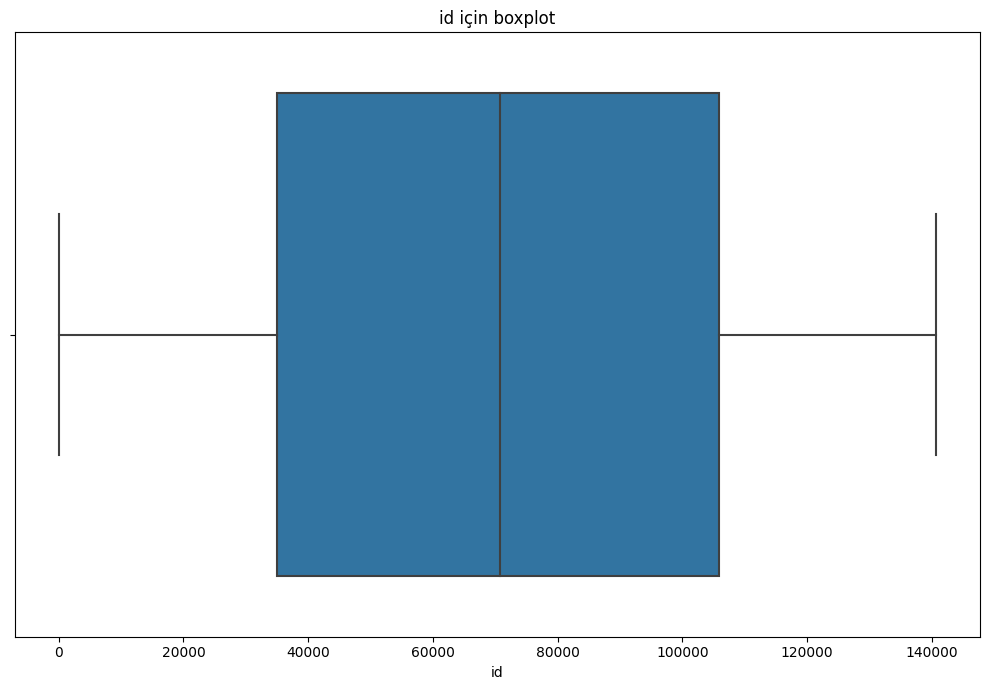

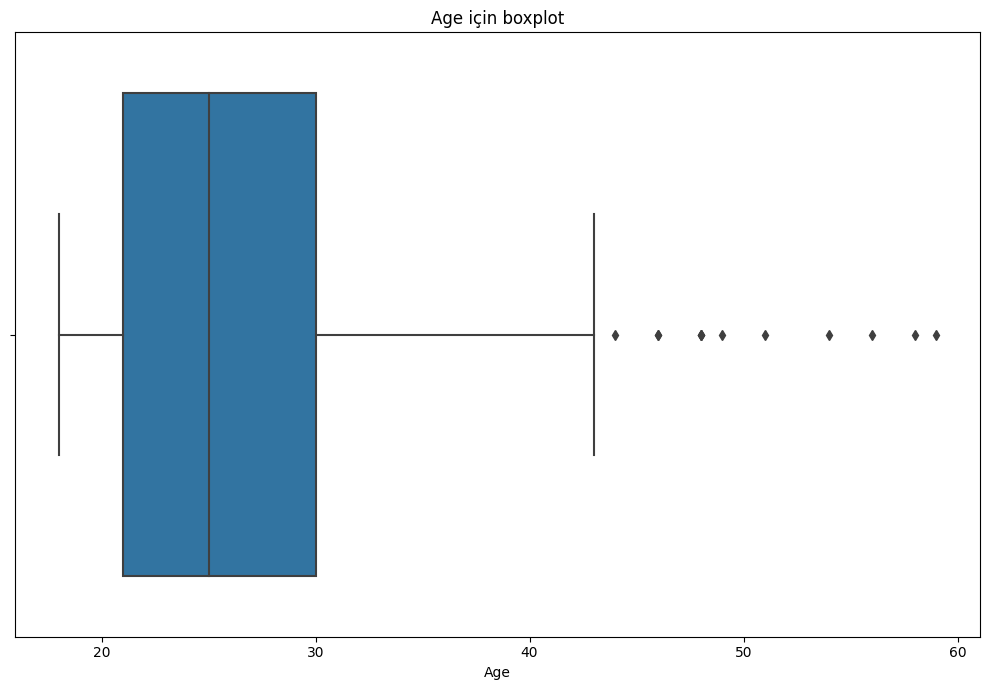

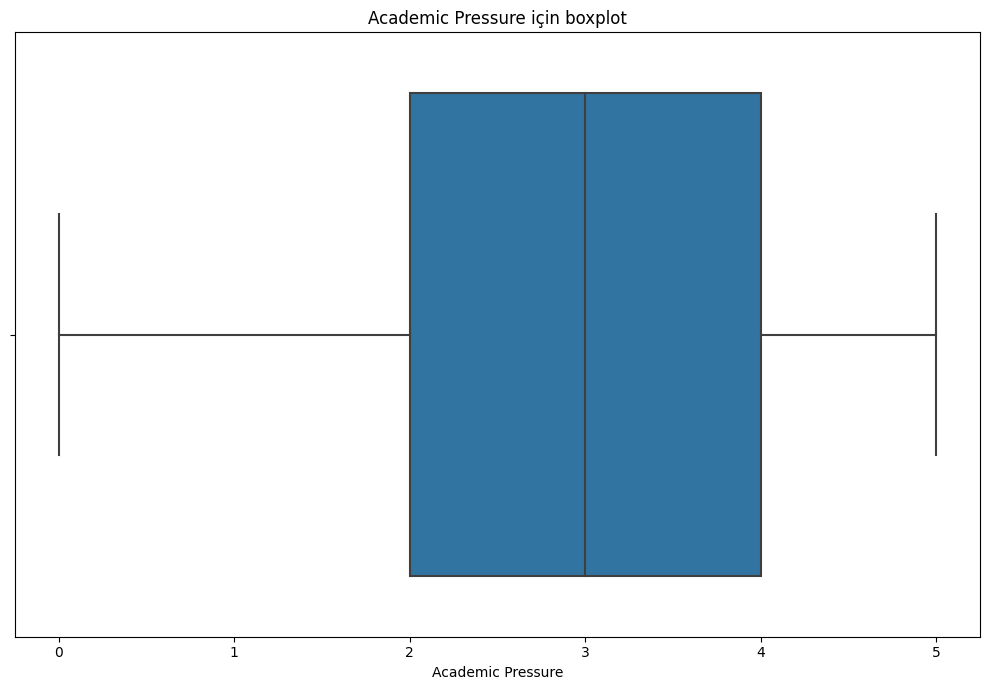

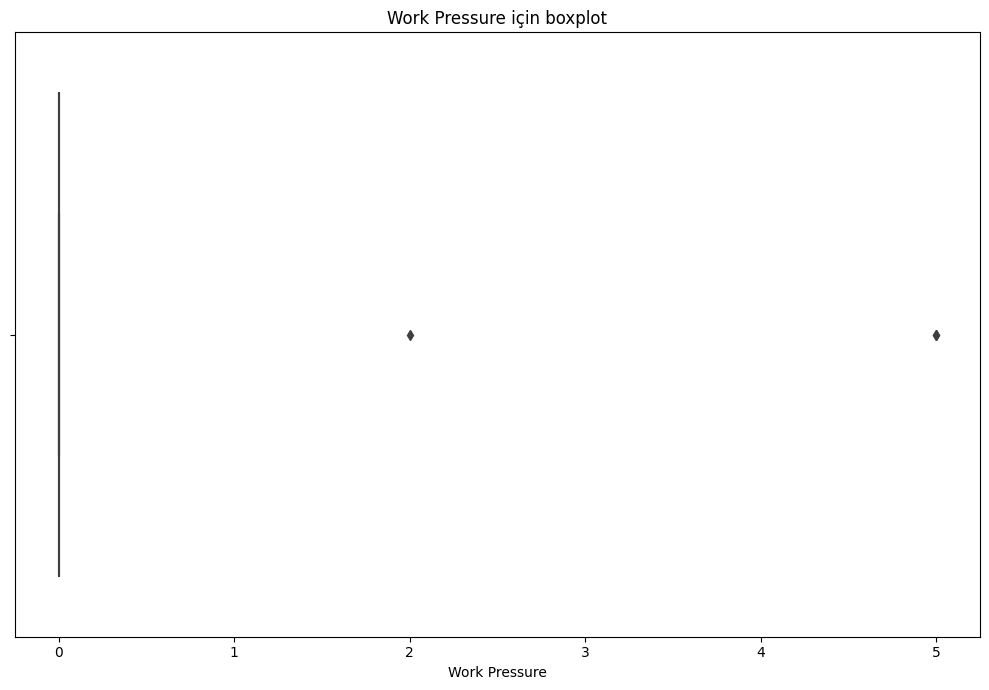

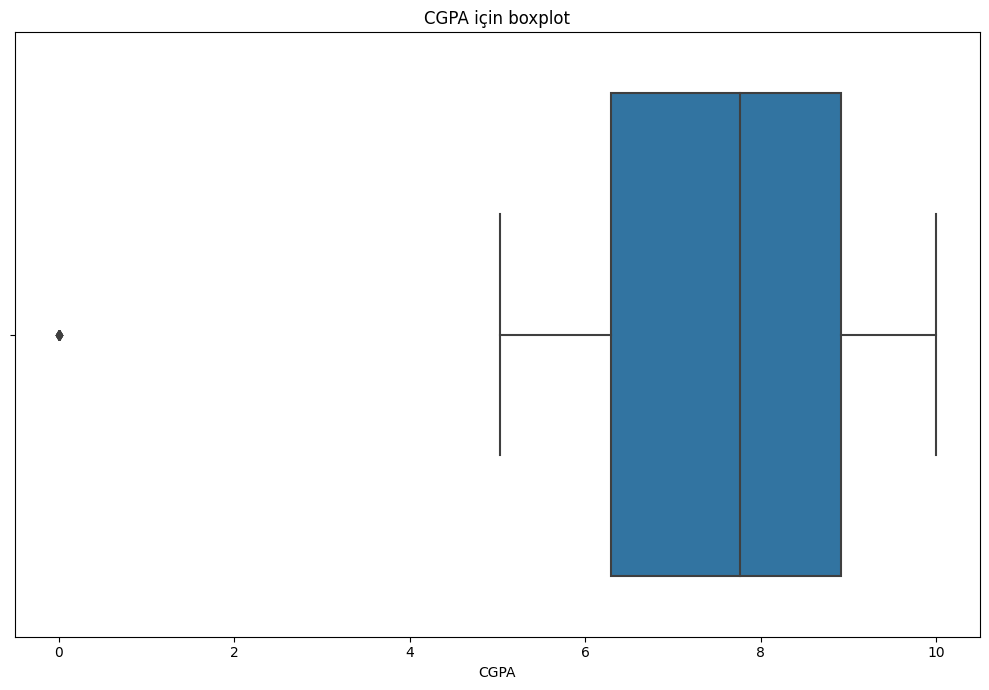

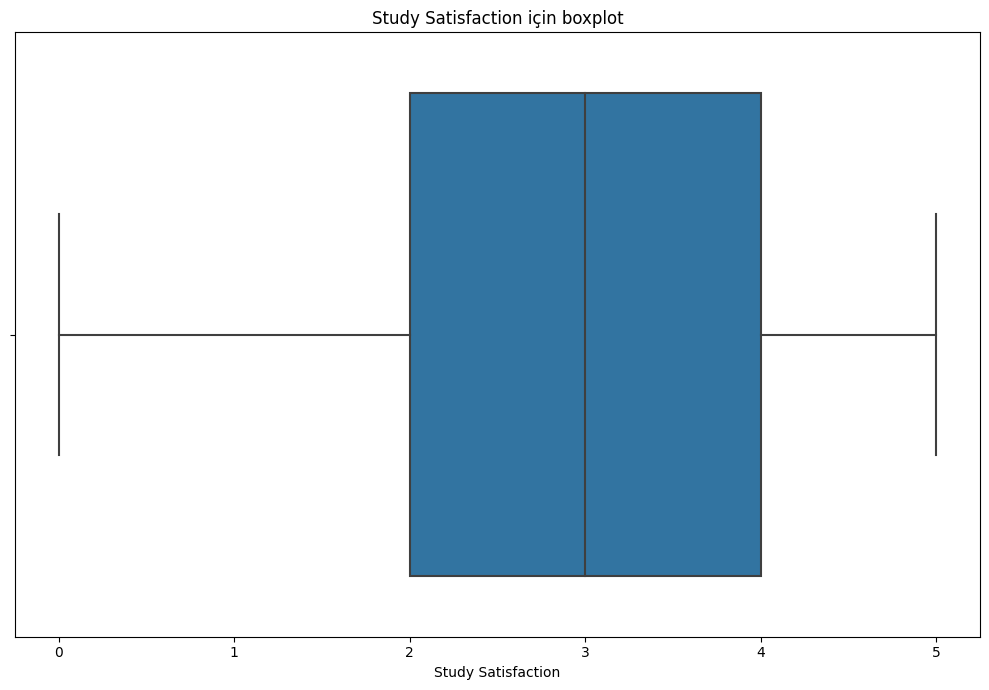

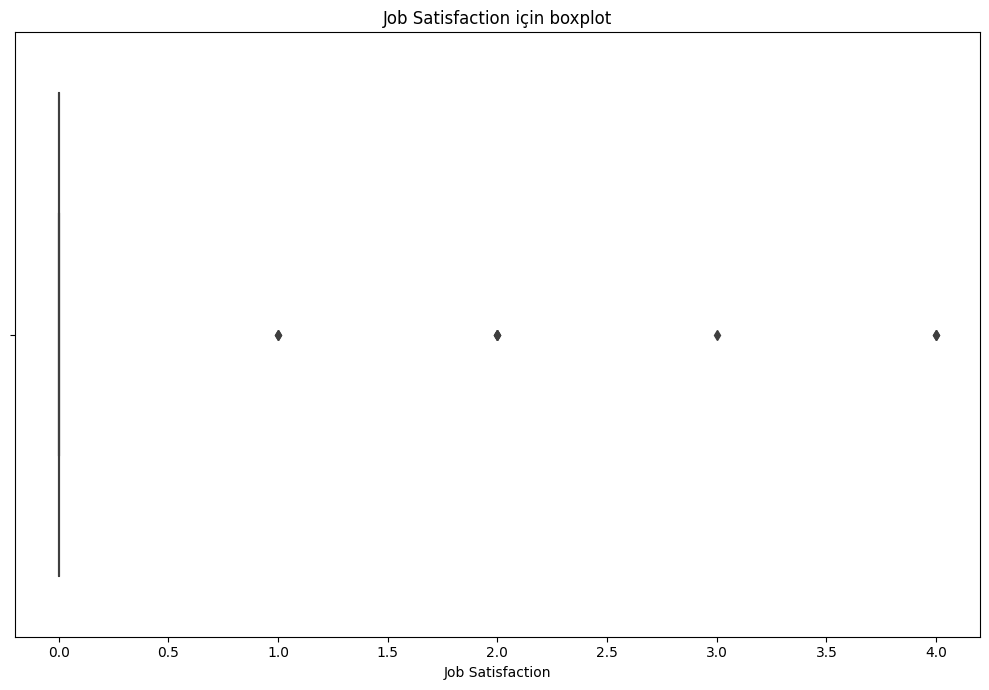

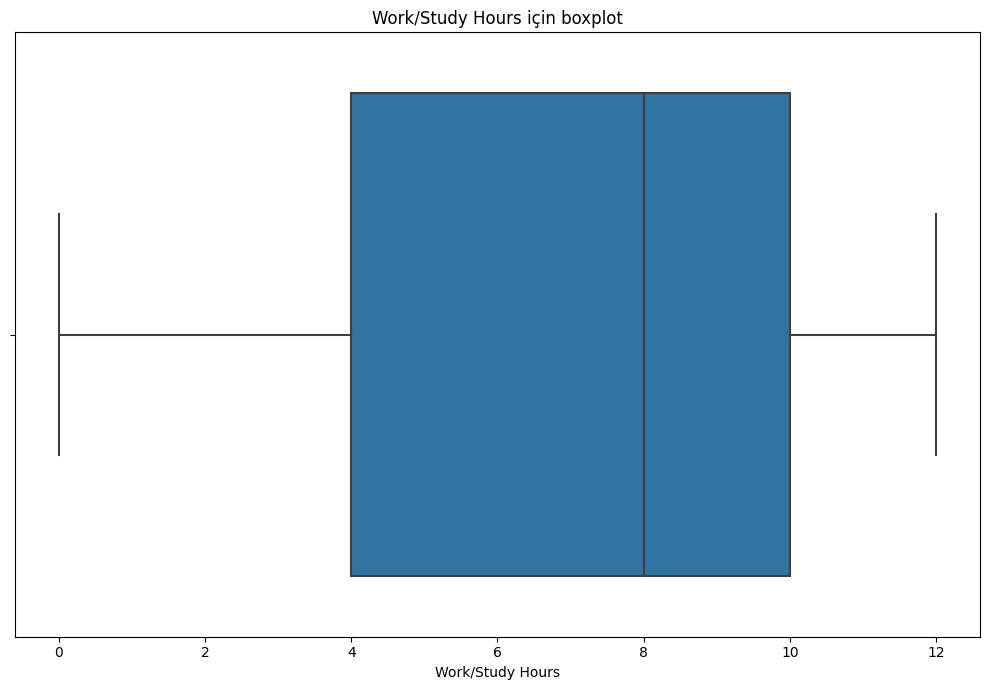

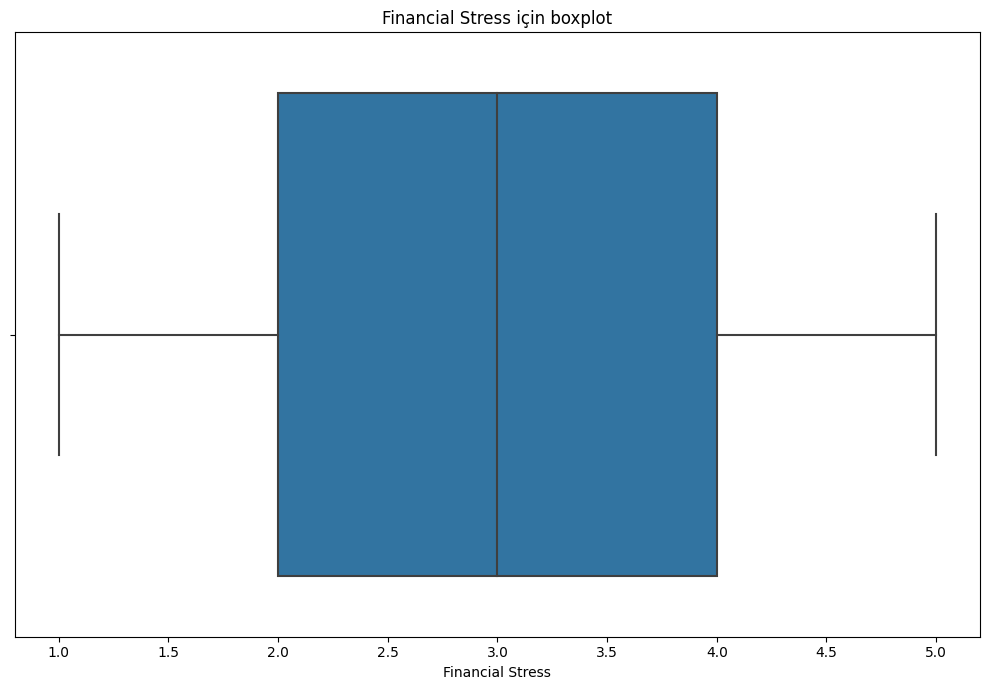

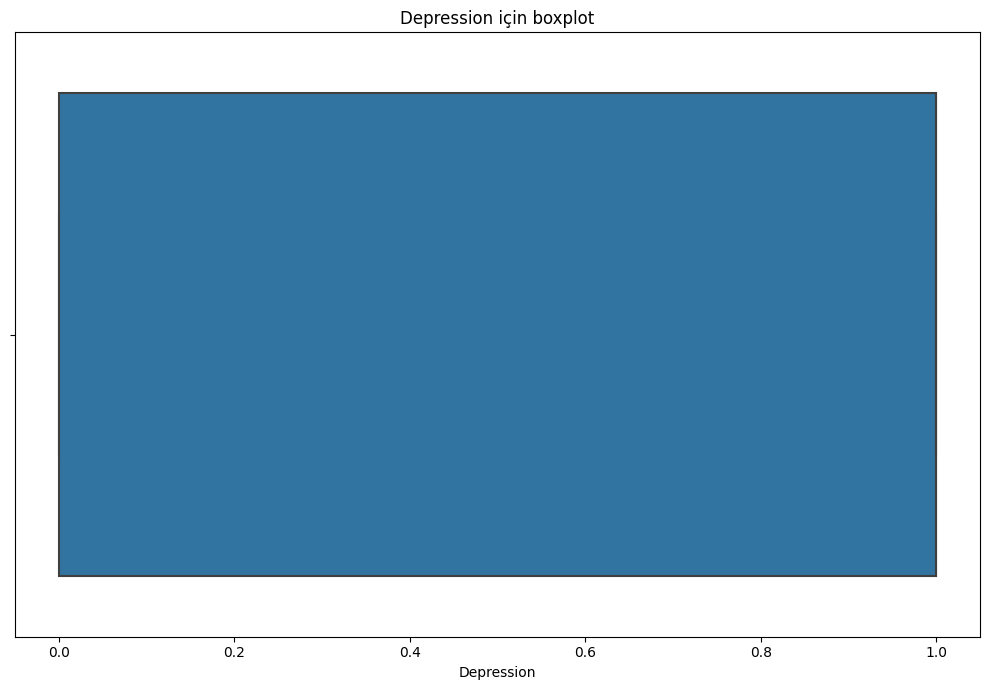

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 7))
    sns.boxplot(x=df[col])
    plt.title(f'{col} için boxplot')
    plt.tight_layout()
    plt.show()

In [217]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # NaN'leri etkilemeden clip uygula
    df.loc[df[col].notna(), col] = df.loc[df[col].notna(), col].clip(lower=lower_bound, upper=upper_bound)

In [218]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [219]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

In [220]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

In [221]:
sleep_map = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 4
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

In [222]:
diet_map = {
    "Unhealthy": 1,
    "Moderate": 2,
    "Healthy": 3
}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_map)

In [223]:
df["Dietary Habits"].value_counts()

Dietary Habits
1    10292
2     9905
3     7639
Name: count, dtype: int64

In [224]:
df = pd.get_dummies(df, columns=['Degree'], drop_first=True)

In [225]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Degree_B.Com                             0
Degree_B.Ed                              0
Degree_B.Pharm                           0
Degree_B.Tech                            0
Degree_BA                                0
Degree_BBA                               0
Degree_BCA                               0
Degree_BE                                0
Degree_BHM 

In [227]:
X = df.drop(columns = ["Depression", "id"])

y = df["Depression"]

In [228]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17615
No     10221
Name: count, dtype: int64

In [229]:
df['Suicidal Thoughts'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

df.drop(columns=['Have you ever had suicidal thoughts ?'], inplace=True)

In [230]:
df.dtypes

id                                    int64
Gender                                int64
Age                                 float64
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                        int64
Dietary Habits                        int64
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness      int64
Depression                            int64
Degree_B.Com                           bool
Degree_B.Ed                            bool
Degree_B.Pharm                         bool
Degree_B.Tech                          bool
Degree_BA                              bool
Degree_BBA                             bool
Degree_BCA                             bool
Degree_BE                              bool
Degree_BHM                      

In [231]:
df.head(5)

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD,Suicidal Thoughts
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,2,3,...,False,False,False,False,False,False,False,False,False,1
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,2,2,...,False,False,False,False,False,False,False,False,False,0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,1,3,...,False,False,False,False,False,False,False,False,False,0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,3,2,...,False,False,False,False,False,False,False,False,False,1
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,2,2,...,False,False,False,False,False,False,False,False,False,1


In [237]:
# X tüm özellik veri kümen (id ve Depression hariç olan)
# Eğer tanımlı değilse yeniden tanımlayalım
X = df.drop(columns=['Depression', 'id'])

# Tüm bool tipli sütunları int'e dönüştür (False → 0, True → 1)
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})

In [238]:
df.head(5)

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD,Suicidal Thoughts
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,2,3,...,False,False,False,False,False,False,False,False,False,1
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,2,2,...,False,False,False,False,False,False,False,False,False,0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,1,3,...,False,False,False,False,False,False,False,False,False,0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,3,2,...,False,False,False,False,False,False,False,False,False,1
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,2,2,...,False,False,False,False,False,False,False,False,False,1


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [241]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter = 1000),
    "Random Forest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(use_label_encoder = False, eval_metric = "logloss"),
    "SVM" : SVC()
}

In [243]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })    

In [244]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.8498563218390804,
  'Precision': 0.862874251497006,
  'Recall': 0.8840490797546012,
  'F1 Score': 0.8733333333333333},
 {'Model': 'Random Forest',
  'Accuracy': 0.8439295977011494,
  'Precision': 0.8576129225246785,
  'Recall': 0.8794478527607362,
  'F1 Score': 0.8683931546266849},
 {'Model': 'XGBoost',
  'Accuracy': 0.8385416666666666,
  'Precision': 0.8531259347891116,
  'Recall': 0.8748466257668711,
  'F1 Score': 0.8638497652582159},
 {'Model': 'SVM',
  'Accuracy': 0.8541666666666666,
  'Precision': 0.8629893238434164,
  'Recall': 0.8926380368098159,
  'F1 Score': 0.8775633293124246}]

In [245]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.849856   0.862874  0.884049  0.873333
1        Random Forest  0.843930   0.857613  0.879448  0.868393
2              XGBoost  0.838542   0.853126  0.874847  0.863850
3                  SVM  0.854167   0.862989  0.892638  0.877563


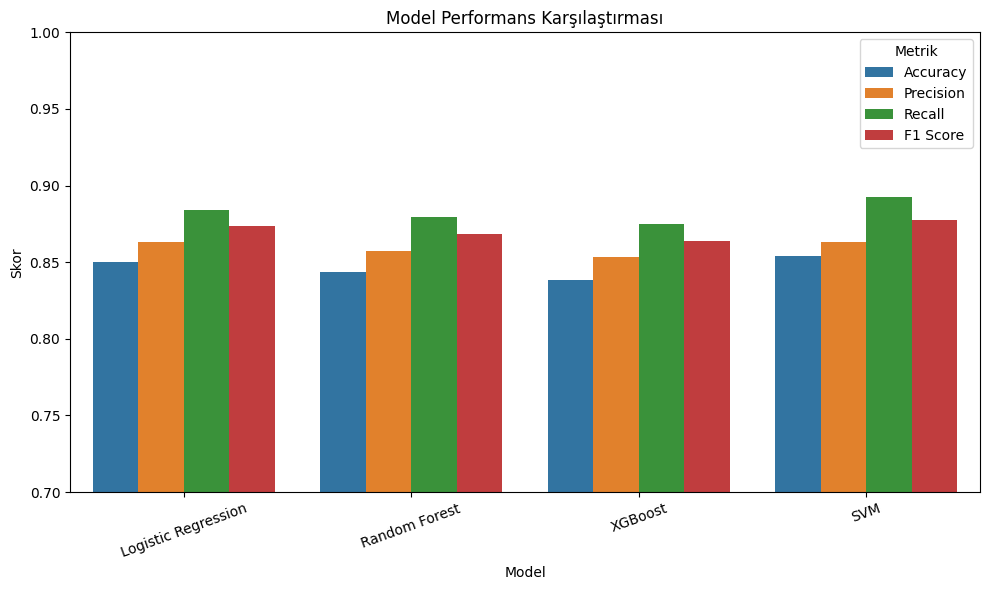

In [246]:
melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Skor")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=20)
plt.legend(title="Metrik")
plt.tight_layout()
plt.show()

In [247]:
!pip install shap

In [248]:
import shap
import numpy as np

In [ ]:
shap_results = {}

for name, model in models.items():
    print(f"🔍 {name} için SHAP hesaplanıyor...")

    if name in ["Random Forest", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_results[name] = (explainer, shap_values)

    elif name == "Logistic Regression":
        explainer = shap.Explainer(model, X_test)
        shap_values = explainer(X_test)
        shap_results[name] = (explainer, shap_values)

    elif name == "SVM":
        # SVM için yavaş ama çalışır
        background = shap.sample(X_train, 100)  # hız için sadece 100 örnek
        explainer = shap.KernelExplainer(model.predict, background)
        shap_values = explainer.shap_values(X_test, nsamples=100)
        shap_results[name] = (explainer, shap_values)

    print(f"✅ {name} için SHAP tamamlandı.\n")

🔍 Logistic Regression için SHAP hesaplanıyor...


In [ ]:
for name, (explainer, shap_values) in shap_results.items():
    print(f"📈 {name} - Özellik Etkisi Grafiği")

    # Tree ve Linear modeller için direkt çalışır
    try:
        shap.plots.beeswarm(shap_values)
    except:
        shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
import joblib

joblib.dump(log_reg_model, "logistic_regression.pkl")
joblib.dump(rf_model, "random_forest.pkl")
joblib.dump(xgb_model, "xgboost.pkl")
joblib.dump(svm_model, "svm.pkl")
